# Tutorial / Assignment 4: NN from Scratch

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Create a function ReLU
### We will use it later in the NN

In [2]:
def relu(z):
    a = np.maximum(0,z)
    return a

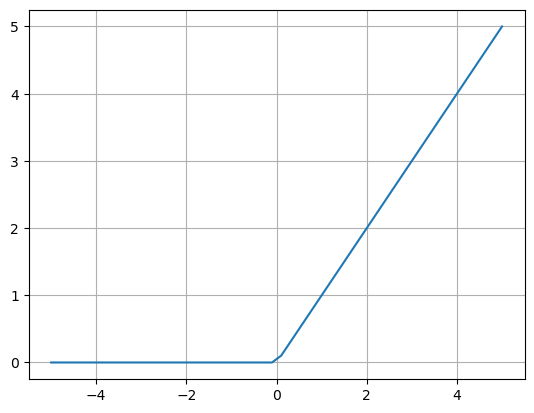

In [3]:
x=np.linspace(-5,5,50)
z = relu(x)
plt.plot(x,z)
plt.grid()
plt.show()

In [4]:
def initialize_params(layer_sizes):
    params = {}
    for i in range(1,len(layer_sizes)):
        params['w'+str(i)]=np.random.randn(layer_sizes[i],layer_sizes[i-1])*0.01
        params['b'+str(i)]=np.random.randn(layer_sizes[i],1)*0.01
    return params

### Loss is defined as $J(w,b) = 1/(2m) (J_{true} - J_{pred})^2$

In [5]:
def forward_propagation(params,X_train):
    layers = len(params)//2
    values = {}
    for i in range(1,layers+1): 
        if i == 1: # transformation from the input layer
            values['z'+str(i)]=np.dot(params['w'+str(i)],X_train)+params['b'+str(i)]
            values['A'+str(i)]=relu(values['z'+str(i)])
        else: # for any other layer
            values['z'+str(i)]=np.dot(params['w'+str(i)],values['A'+str(i-1)])+params['b'+str(i)]
            if i==layers:
                values['A'+str(i)] = values['z'+str(i)]
            else:
                values['A'+str(i)] = relu(values['z'+str(i)])
    return values

### Create a loss function

In [6]:
def compute_cost(values,Y_train):
    layers = len(paramas)//2
    Y_pred = values['A'+str(layers)]
    cost = 1/(2*len(Y_train))*np.sum(np.square(Y_train - Y_pred))
    return cost 

In [7]:
def backward_propagation(params, values, X_train, Y_train): 
    #takes parameters, activations, training set as input and returns gradients wrt parameters
    layers = len(params)//2
    m = len(Y_train)
    grads = {}
    for i in range(layers,0,-1):
        if i==layers:
            dA = 1/m * (values['A' + str(i)] - Y_train)
            dZ = dA
        else:
            dA = np.dot(params['W' + str(i+1)].T, dZ)
            dZ = np.multiply(dA, np.where(values['A' + str(i)]>=0, 1, 0))
        if i==1:
            grads['W' + str(i)] = 1/m * np.dot(dZ, X_train.T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        else:
            grads['W' + str(i)] = 1/m * np.dot(dZ,values['A' + str(i-1)].T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    return grads

In [8]:
def update_params(params, grads, learning_rate): 
    #takes parameters, gradients and learning rate as input and returns updated parameters
    layers = len(params)//2
    params_updated = {}
    for i in range(1,layers+1):
        params_updated['W' + str(i)] = params['W' + str(i)] - learning_rate * grads['W' + str(i)]
        params_updated['B' + str(i)] = params['B' + str(i)] - learning_rate * grads['B' + str(i)]
    return params_updated

In [9]:
#MSE_Train
def model(X_train, Y_train, layer_sizes, num_iters, learning_rate): #trains the model
    params = initialize_params(layer_sizes)
    for i in range(num_iters):
        values = forward_propagation(X_train.T, params)
        cost = compute_cost(values, Y_train.T)
        print(f'cost of {i}th iteration: {cost}')
        grads = backward_propagation(params, values,X_train.T, Y_train.T)
        params = update_params(params, grads, learning_rate)
        #print('Cost at iteration ' + str(i+1) + ' = ' + str(cost) + '\n')
    return params

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(0)
    weights_input_hidden = np.random.randn(input_size, hidden_size)
    bias_input_hidden = np.zeros((1, hidden_size))
    weights_hidden_output = np.random.randn(hidden_size, output_size)
    bias_hidden_output = np.zeros((1, output_size))
    return weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output

def forward_propagation(X, weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output):
    hidden_input = np.dot(X, weights_input_hidden) + bias_input_hidden
    hidden_output = sigmoid(hidden_input)
    output = np.dot(hidden_output, weights_hidden_output) + bias_hidden_output
    return hidden_input, hidden_output, output

def backward_propagation(X, y, output, hidden_output, weights_hidden_output):
    output_error = y - output
    output_delta = output_error
    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)
    return output_delta, hidden_delta

def update_parameters(X, hidden_output, output_delta, hidden_delta, weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output, learning_rate):
    weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
    bias_hidden_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
    bias_input_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate
    return weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output

def train_neural_network(X, y, input_size, hidden_size, output_size, epochs, learning_rate):
    weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output = initialize_parameters(input_size, hidden_size, output_size)
    
    for epoch in range(epochs):
        hidden_input, hidden_output, output = forward_propagation(X, weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output)
        output_delta, hidden_delta = backward_propagation(X, y, output, hidden_output, weights_hidden_output)
        weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output = update_parameters(X, hidden_output, output_delta, hidden_delta, weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output, learning_rate)
    
    return weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output

def predict(X, weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output):
    _, _, output = forward_propagation(X, weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output)
    return output

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
